Decreasing trend

In [ ]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 2.9 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74598 sha256=16495b9f400e224e69cac87ebca89f4ab264cda0210db5b6a878d8200cdb040c
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 5.4 MB/s 


In [ ]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 6.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=a3a517b9e33f86ad002fcdcd2fafaeafeec9e3120b714a513731ac7dbd2b6f13
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
khashregh = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khashregh.csv')
khashregh

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,15550.0,15550.0,16380.0,15880.0,1400-1-7,خشرق,4407546,2021-03-27,NaN,15880.000000,NaN
1,15800.0,15570.0,16030.0,15670.0,1400-1-8,خشرق,2643513,2021-03-28,NaN,15754.000000,NaN
2,15360.0,15360.0,15600.0,15380.0,1400-1-10,خشرق,2952101,2021-03-30,NaN,15576.842105,NaN
3,15150.0,15080.0,15560.0,15130.0,1400-1-11,خشرق,2900818,2021-03-31,NaN,15391.230769,NaN
4,14840.0,14830.0,15000.0,14990.0,1400-1-14,خشرق,1495694,2021-04-03,15410.0,15237.203791,NaN
...,...,...,...,...,...,...,...,...,...,...,...
186,10800.0,10420.0,11150.0,10790.0,1400-10-27,خشرق,1322618,2022-01-17,11118.0,10988.199738,40.789492
187,10830.0,10260.0,10830.0,10470.0,1400-10-28,خشرق,804793,2022-01-18,10902.0,10815.466492,37.232378
188,10610.0,9950.0,10610.0,10160.0,1400-10-29,خشرق,1252378,2022-01-19,10632.0,10596.977661,34.127462
189,10000.0,9660.0,10200.0,9890.0,1400-11-2,خشرق,979734,2022-01-22,10422.0,10361.318441,31.651679


In [ ]:
khashregh_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خشرق.xlsx')
khashregh_social

,date and time,view
0,۱۸:۵۶:۱۷ ۱۴۰۰/۰۱/۰۲,793
1,۱۸:۵۶:۱۷ ۱۴۰۰/۰۱/۰۲,682
2,۱۸:۵۶:۱۷ ۱۴۰۰/۰۱/۰۲,704
3,۱۸:۵۶:۵۶ ۱۴۰۰/۰۱/۰۲,810
4,۱۴:۱۷:۰۳ ۱۴۰۰/۰۱/۰۵,10
...,...,...
6335,۱۱:۵۷:۰۳ ۱۴۰۰/۱۱/۰۳,67
6336,۱۲:۰۹:۱۹ ۱۴۰۰/۱۱/۰۳,2
6337,۱۲:۱۵:۲۰ ۱۴۰۰/۱۱/۰۳,13
6338,۱۲:۱۵:۲۳ ۱۴۰۰/۱۱/۰۳,5


In [ ]:
khashregh_social.columns = ['date and time', 'view']
khashregh_social['presian_date'] = khashregh_social['date and time'].apply(lambda x: x.split(" ")[1])
khashregh_social['gregorian_date'] = khashregh_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khashregh_social = khashregh_social[['gregorian_date', 'view']]
khashregh_social = khashregh_social.groupby(by='gregorian_date').mean()
khashregh_social['gregorian_date'] = khashregh_social.index
khashregh_social['gregorian_date'] = khashregh_social['gregorian_date'].astype(str)
khashregh_social['index'] = [i for i in range(len(khashregh_social))]
khashregh_social.set_index('index', inplace=True)
khashregh_social

,view,gregorian_date
index,,
0,747.250000,2021-03-22
1,3539.266667,2021-03-25
2,3327.250000,2021-03-26
3,1049.340000,2021-03-27
4,3377.363636,2021-03-28
...,...,...
274,241.333333,2022-01-19
275,2892.000000,2022-01-20
276,1439.571429,2022-01-21


# Merging view indicators with closeprice indicators

In [ ]:
khashregh_df=pd.merge(khashregh,khashregh_social, on='gregorian_date', how='inner')
khashregh_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,15550.0,15550.0,16380.0,15880.0,1400-1-7,خشرق,4407546,2021-03-27,NaN,15880.000000,NaN,1049.340000
1,15800.0,15570.0,16030.0,15670.0,1400-1-8,خشرق,2643513,2021-03-28,NaN,15754.000000,NaN,3377.363636
2,15360.0,15360.0,15600.0,15380.0,1400-1-10,خشرق,2952101,2021-03-30,NaN,15576.842105,NaN,1020.846154
3,15150.0,15080.0,15560.0,15130.0,1400-1-11,خشرق,2900818,2021-03-31,NaN,15391.230769,NaN,2063.333333
4,14840.0,14830.0,15000.0,14990.0,1400-1-14,خشرق,1495694,2021-04-03,15410.0,15237.203791,NaN,808.484848
...,...,...,...,...,...,...,...,...,...,...,...,...
181,10800.0,10420.0,11150.0,10790.0,1400-10-27,خشرق,1322618,2022-01-17,11118.0,10988.199738,40.789492,617.200000
182,10830.0,10260.0,10830.0,10470.0,1400-10-28,خشرق,804793,2022-01-18,10902.0,10815.466492,37.232378,44.448276
183,10610.0,9950.0,10610.0,10160.0,1400-10-29,خشرق,1252378,2022-01-19,10632.0,10596.977661,34.127462,241.333333
184,10000.0,9660.0,10200.0,9890.0,1400-11-2,خشرق,979734,2022-01-22,10422.0,10361.318441,31.651679,87.217391


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [ ]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    gain = 0 * oneday
    loss = 0 * oneday
    
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [ ]:
khashregh_df['view'] = khashregh_df['view'].to_frame()
khashregh_df['SMA5_view'] = khashregh_df['view'].rolling(5).mean()
khashregh_df['EWMA5_view'] = khashregh_df['view'].ewm(span=5).mean()
khashregh_df['RSI_view'] = computeRSI(khashregh_df['view'], 14)

In [ ]:
khashregh_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,15550.0,15550.0,16380.0,15880.0,1400-1-7,خشرق,4407546,2021-03-27,NaN,15880.000000,NaN,1049.340000,NaN,1049.340000,NaN
1,15800.0,15570.0,16030.0,15670.0,1400-1-8,خشرق,2643513,2021-03-28,NaN,15754.000000,NaN,3377.363636,NaN,2446.154182,NaN
2,15360.0,15360.0,15600.0,15380.0,1400-1-10,خشرق,2952101,2021-03-30,NaN,15576.842105,NaN,1020.846154,NaN,1771.008274,NaN
3,15150.0,15080.0,15560.0,15130.0,1400-1-11,خشرق,2900818,2021-03-31,NaN,15391.230769,NaN,2063.333333,NaN,1892.435606,NaN
4,14840.0,14830.0,15000.0,14990.0,1400-1-14,خشرق,1495694,2021-04-03,15410.0,15237.203791,NaN,808.484848,1663.873594,1476.321808,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,10800.0,10420.0,11150.0,10790.0,1400-10-27,خشرق,1322618,2022-01-17,11118.0,10988.199738,40.789492,617.200000,468.204286,440.860990,51.010189
182,10830.0,10260.0,10830.0,10470.0,1400-10-28,خشرق,804793,2022-01-18,10902.0,10815.466492,37.232378,44.448276,430.460608,308.723419,46.369265
183,10610.0,9950.0,10610.0,10160.0,1400-10-29,خشرق,1252378,2022-01-19,10632.0,10596.977661,34.127462,241.333333,227.477274,286.260057,48.116720
184,10000.0,9660.0,10200.0,9890.0,1400-11-2,خشرق,979734,2022-01-22,10422.0,10361.318441,31.651679,87.217391,215.873133,219.912502,46.830427


# RSI

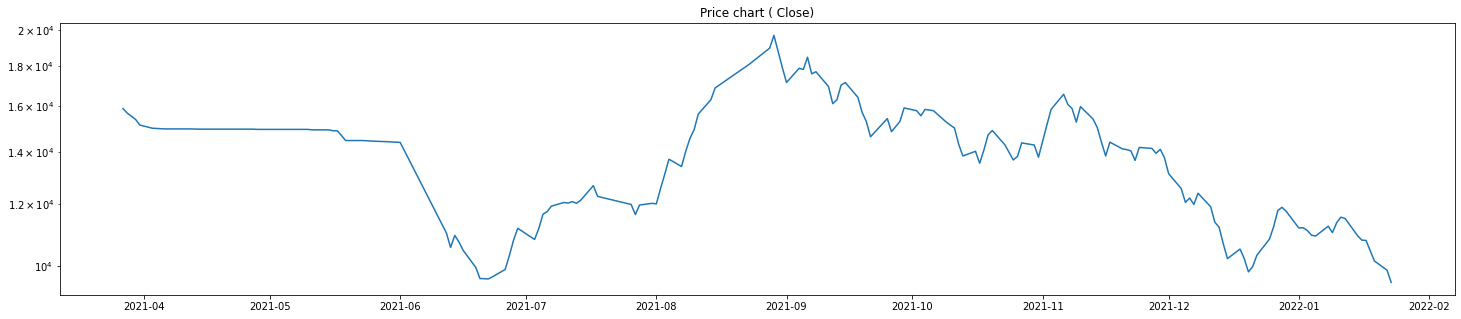

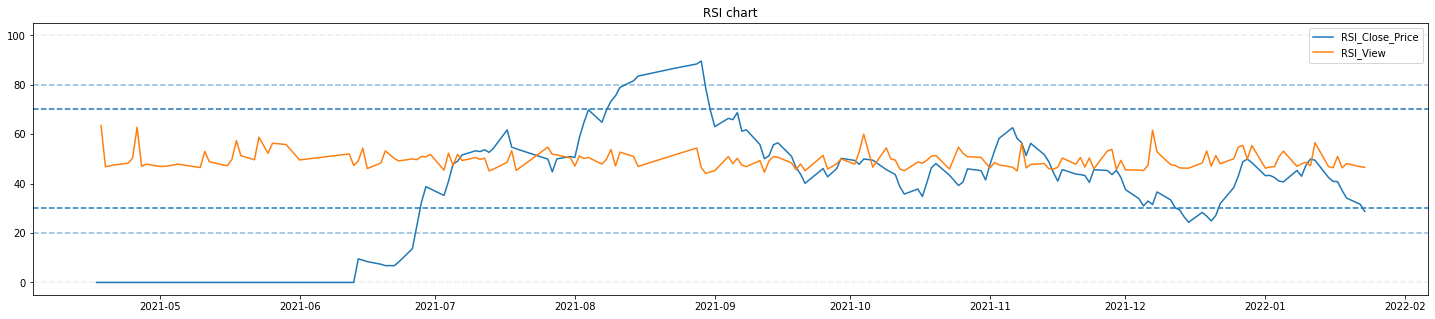

In [ ]:
plt.figure(figsize=(25,5))
khashregh_df['date'] = pd.to_datetime(khashregh_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khashregh_df['date'], khashregh_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khashregh_df['date'], khashregh_df['RSI'],label='RSI_Close_Price')
plt.plot(khashregh_df['date'], khashregh_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
khashregh_df.columns = [x.lower() for x in khashregh_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khashregh_df['gregorian_date'],
        y=(khashregh_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khashregh_df['gregorian_date'],
        y=khashregh_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khashregh_df['gregorian_date'],
        y=khashregh_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [ ]:
khashregh_df.columns = [x.lower() for x in khashregh_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khashregh_df['gregorian_date'],
        y=(khashregh_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khashregh_df['gregorian_date'],
        y=khashregh_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khashregh_df['gregorian_date'],
        y=khashregh_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khashregh_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,15550.0,15550.0,16380.0,15880.0,1400-1-7,خشرق,4407546,2021-03-27,NaN,15880.000000,NaN,1049.340000,NaN,1049.340000,NaN,2021-03-27
1,15800.0,15570.0,16030.0,15670.0,1400-1-8,خشرق,2643513,2021-03-28,NaN,15754.000000,NaN,3377.363636,NaN,2446.154182,NaN,2021-03-28
2,15360.0,15360.0,15600.0,15380.0,1400-1-10,خشرق,2952101,2021-03-30,NaN,15576.842105,NaN,1020.846154,NaN,1771.008274,NaN,2021-03-30
3,15150.0,15080.0,15560.0,15130.0,1400-1-11,خشرق,2900818,2021-03-31,NaN,15391.230769,NaN,2063.333333,NaN,1892.435606,NaN,2021-03-31
4,14840.0,14830.0,15000.0,14990.0,1400-1-14,خشرق,1495694,2021-04-03,15410.0,15237.203791,NaN,808.484848,1663.873594,1476.321808,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,10800.0,10420.0,11150.0,10790.0,1400-10-27,خشرق,1322618,2022-01-17,11118.0,10988.199738,40.789492,617.200000,468.204286,440.860990,51.010189,2022-01-17
182,10830.0,10260.0,10830.0,10470.0,1400-10-28,خشرق,804793,2022-01-18,10902.0,10815.466492,37.232378,44.448276,430.460608,308.723419,46.369265,2022-01-18
183,10610.0,9950.0,10610.0,10160.0,1400-10-29,خشرق,1252378,2022-01-19,10632.0,10596.977661,34.127462,241.333333,227.477274,286.260057,48.116720,2022-01-19
184,10000.0,9660.0,10200.0,9890.0,1400-11-2,خشرق,979734,2022-01-22,10422.0,10361.318441,31.651679,87.217391,215.873133,219.912502,46.830427,2022-01-22


In [ ]:
khashregh_df['sma5']=khashregh_df['sma5'].fillna(value=khashregh_df['sma5'].mean())
khashregh_df['rsi']=khashregh_df['rsi'].fillna(value=khashregh_df['rsi'].mean())
khashregh_df['sma5_view']=khashregh_df['sma5_view'].fillna(value=khashregh_df['sma5_view'].mean())
khashregh_df['rsi_view']=khashregh_df['rsi_view'].fillna(value=khashregh_df['rsi_view'].mean())

In [ ]:
khashregh_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,15550.0,15550.0,16380.0,15880.0,1400-1-7,خشرق,4407546,2021-03-27,13716.406593,15880.000000,38.286055,1049.340000,1005.877540,1049.340000,49.530884,2021-03-27
1,15800.0,15570.0,16030.0,15670.0,1400-1-8,خشرق,2643513,2021-03-28,13716.406593,15754.000000,38.286055,3377.363636,1005.877540,2446.154182,49.530884,2021-03-28
2,15360.0,15360.0,15600.0,15380.0,1400-1-10,خشرق,2952101,2021-03-30,13716.406593,15576.842105,38.286055,1020.846154,1005.877540,1771.008274,49.530884,2021-03-30
3,15150.0,15080.0,15560.0,15130.0,1400-1-11,خشرق,2900818,2021-03-31,13716.406593,15391.230769,38.286055,2063.333333,1005.877540,1892.435606,49.530884,2021-03-31
4,14840.0,14830.0,15000.0,14990.0,1400-1-14,خشرق,1495694,2021-04-03,15410.000000,15237.203791,38.286055,808.484848,1663.873594,1476.321808,49.530884,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,10800.0,10420.0,11150.0,10790.0,1400-10-27,خشرق,1322618,2022-01-17,11118.000000,10988.199738,40.789492,617.200000,468.204286,440.860990,51.010189,2022-01-17
182,10830.0,10260.0,10830.0,10470.0,1400-10-28,خشرق,804793,2022-01-18,10902.000000,10815.466492,37.232378,44.448276,430.460608,308.723419,46.369265,2022-01-18
183,10610.0,9950.0,10610.0,10160.0,1400-10-29,خشرق,1252378,2022-01-19,10632.000000,10596.977661,34.127462,241.333333,227.477274,286.260057,48.116720,2022-01-19
184,10000.0,9660.0,10200.0,9890.0,1400-11-2,خشرق,979734,2022-01-22,10422.000000,10361.318441,31.651679,87.217391,215.873133,219.912502,46.830427,2022-01-22


In [ ]:
khashregh_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price

In [ ]:
khshregh_new = khashregh_df[['gregorian_date','close']]

print("Shape of dataframe:", khshregh_new.shape)

Shape of dataframe: (186, 2)


In [ ]:
del khshregh_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khshregh_new=scaler.fit_transform(np.array(khshregh_new).reshape(-1,1))


In [ ]:
def split(y, train_size=0.72):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khshregh_new, train_size=0.78)
# print("train_data: ", train_data.shape)
# print("test_data: ", test_data.shape)
# print("X_train: ", X_train.shape)
# print("y_train: ", y_train.shape)
# print("X_test: ", X_test.shape)
# print("y_test", y_test.shape)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating model

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=5,verbose=1)

Epoch 1/50
26/26 [==============================] - 9s 90ms/step - loss: 0.0553 - val_loss: 0.0591
Epoch 2/50
26/26 [==============================] - 1s 32ms/step - loss: 0.0305 - val_loss: 0.0426
Epoch 3/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0253 - val_loss: 0.0258
Epoch 4/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0228 - val_loss: 0.0190
Epoch 5/50
26/26 [==============================] - 1s 26ms/step - loss: 0.0200 - val_loss: 0.0117
Epoch 6/50
26/26 [==============================] - 1s 26ms/step - loss: 0.0189 - val_loss: 0.0087
Epoch 7/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0158 - val_loss: 0.0077
Epoch 8/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0139 - val_loss: 0.0132
Epoch 9/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0128 - val_loss: 0.0144
Epoch 10/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0127 - val_loss: 0.0151
Epoch 11/

LOSS

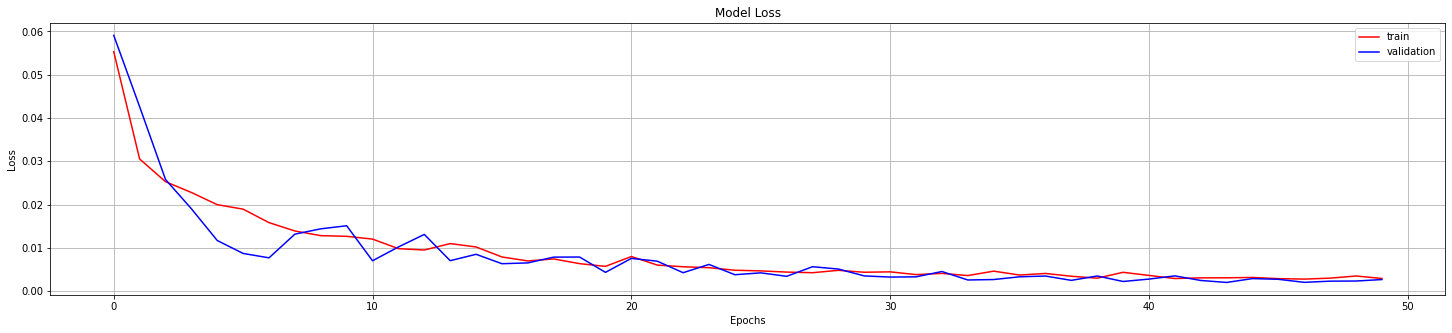

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.1893948616140183


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)

[[0.04369669407606125], [0.04274307191371918], [0.05202887952327728], [0.063710518181324], [0.07728260010480881]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction_closeprice

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khshregh_new[len(khshregh_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days of close price ','Predicted next 5 days of close price '])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khashregh stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =9540 , 4 bahmn = 9090   (decrease < -0.5 we assaign -1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =9540 ,  our model prediction for 4 bahmn(timestamp=16) = 9983 (increase > 0.5 we assaign +1 (based on pdf))
##------------------------------------------------------------------------------
### SO our model couldnt predict correct so we use indicators



## Part 2 prediction with adding social indicators

### Indicators

In [ ]:
khashregh_new = khashregh_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


print("Shape of dataframe:", khashregh_new.shape)

Shape of dataframe: (186, 5)


In [ ]:
del khashregh_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khashregh_new=scaler.fit_transform(np.array(khashregh_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khashregh_new, train_size=0.90)
# print("train_data: ", train_data.shape)
# print("test_data: ", test_data.shape)
# print("X_train: ", X_train.shape)
# print("y_train: ", y_train.shape)
# print("X_test: ", X_test.shape)
# print("y_test", y_test.shape)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=5,verbose=1)


Epoch 1/50
131/131 [==============================] - 16s 38ms/step - loss: 0.1064 - val_loss: 0.0717
Epoch 2/50
131/131 [==============================] - 3s 25ms/step - loss: 0.0946 - val_loss: 0.1020
Epoch 3/50
131/131 [==============================] - 3s 24ms/step - loss: 0.0503 - val_loss: 0.0245
Epoch 4/50
131/131 [==============================] - 3s 24ms/step - loss: 0.0185 - val_loss: 0.0248
Epoch 5/50
131/131 [==============================] - 3s 24ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 6/50
131/131 [==============================] - 3s 25ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 7/50
131/131 [==============================] - 3s 25ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 8/50
131/131 [==============================] - 3s 26ms/step - loss: 0.0032 - val_loss: 0.0070
Epoch 9/50
131/131 [==============================] - 3s 24ms/step - loss: 0.0027 - val_loss: 3.0368e-04
Epoch 10/50
131/131 [==============================] - 3s 25ms/step - loss: 0.0042 - v

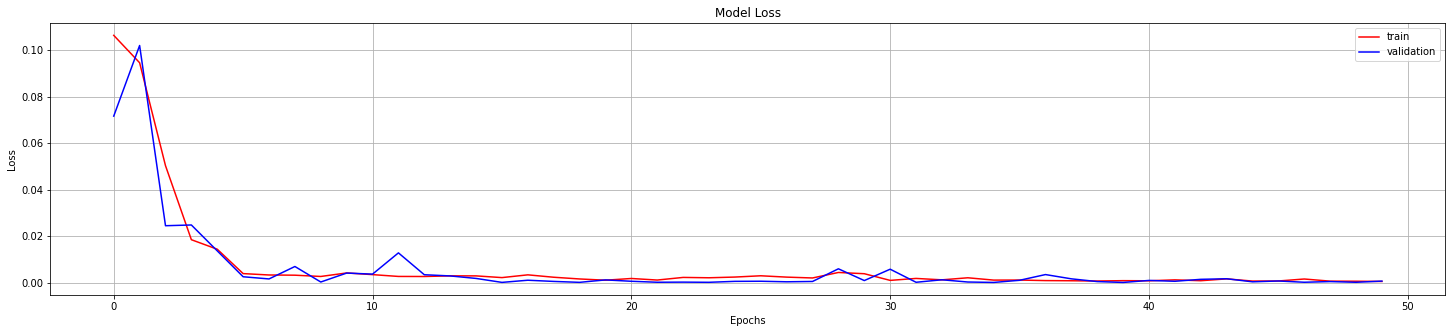

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.9892135093102465


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.006207522004842758], [-0.0006069950759410858], [0.6066735982894897], [0.03935310244560242], [0.004349380731582642]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khashregh_new[len(khashregh_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khashregh stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Decreasing trend

##### Real close_price--> 3 bahman in tsetmc site =9540 , 4 bahmn = 9090   (decrease < -0.5 we assaign -1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =210.51 ,  our model prediction for 4 bahmn(timestamp=16) = 115.93 (decrease < -0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### SO our accuarcy is 100% with adding social indicators